# Introduction

Your submission is scored according to the <font color='Red'>penalty cost to Santa for suboptimal scheduling</font>. \
The <u>constraints and penalties</u> are as follows:

- The total number of people attending the workshop <font color='Red'>each day must be between 125 - 300</font>.\
    If even one day is outside these occupancy constraints, the submission will error and will not be scored.
    
    
- Santa provides consolation gifts (of varying value) to families <u>according to their assigned day relative to their preferences</u>. \
    These sum up per family, and the total represents the ***preferencecost***.
    - choice_0: no consolation gifts
    - choice_1: one $\$50$ gift card to Santa's Gift Shop
    - choice_2: one $\$50$ gift card, and 25% off Santa's Buffet (value $\$9$) for each family member
    - choice_3: one $\$100$ gift card, and 25% off Santa's Buffet (value $\$9$) for each family member
    - choice_4: one $\$200$ gift card, and 25% off Santa's Buffet (value $\$9$) for each family member
    - choice_5: one $\$200$ gift card, and 50% off Santa's Buffet (value $\$18$) for each family member
    - choice_6: one $\$300$ gift card, and 50% off Santa's Buffet (value $\$18$) for each family member
    - choice_7: one $\$300$ gift card, and free Santa's Buffet (value $\$36$) for each family member
    - choice_8: one $\$400$ gift card, and free Santa's Buffet (value $\$36$) for each family member
    - choice_9: one $\$500$ gift card, and free Santa's Buffet (value $\$36$) for each family member, and 50% off North Pole Helicopter Ride tickets (value $\$199$) for each family member
    - otherwise: one $\$500$ gift card, and free Santa's Buffet (value $\$36$) for each family member, and free North Pole Helicopter Ride tickets (value $\$398$) for each family member
 
 
 -  Santa's accountants have also developed an **empirical equation for cost to Santa** that arise from many different effects such as reduced shopping in the Gift Shop when it gets too crowded, extra cleaning costs, a very complicated North Pole tax code, etc.\
 This cost in <font color='Red'>in addition to the consolation gifts</font> Santa provides above, and is defined as:
 
 
 $$
 accounting\:penalty = \sum^1_{d=100}\frac{(N_d-125)}{400}N_d^{(\frac{1}{2}+\frac{|N_d-N_{d+1}|}{50})}
 $$
 
 
 where $N_d$ is the **occupancy of the current day**, and Nd+1 is the occupancy of the previous day (since we're <font color='Red'>counting backwards from Christmas!</font>). \
 For the initial condition of d=100, $N_{101}=N_{100}$.

To be clear on the above summation, it starts on the date 100 days before Christmas and ends on Christmas Eve.\
And <font color='red'>Finaly</font>:


$$
score = preference\:cost + accounting\:penalty
$$

# Imports

In [1]:
# !kaggle competitions download -c santa-workshop-tour-2019

In [2]:
# !unzip santa-workshop-tour-2019.zipa

In [3]:
# !rm santa-workshop-tour-2019.zip

In [4]:
import pandas as pd
import numpy as np

In [7]:
import sys
sys.path.append('../../modules/yashima/tools/')
from tools import Process

# Load Data

In [8]:
data = pd.read_csv('../input/family_data.csv', index_col='family_id')
submission = pd.read_csv('../input/sample_submission.csv', index_col='family_id')

# Basic EDA

In [9]:
Process.basic_eda(data)

----------TOP 5 RECORDS--------


,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


None
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
choice_0    5000 non-null int64
choice_1    5000 non-null int64
choice_2    5000 non-null int64
choice_3    5000 non-null int64
choice_4    5000 non-null int64
choice_5    5000 non-null int64
choice_6    5000 non-null int64
choice_7    5000 non-null int64
choice_8    5000 non-null int64
choice_9    5000 non-null int64
n_people    5000 non-null int64
dtypes: int64(11)
memory usage: 468.8 KB
None
----------Describe-------------


,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,40.715000,41.601000,41.194200,41.595000,41.950600,42.63520,41.965000,42.739600,42.33900,42.608200,4.20060
std,29.054208,29.518375,28.821878,29.094602,29.045049,28.98729,28.711089,28.959156,28.69832,28.116088,1.53272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,2.00000
25%,16.000000,16.000000,17.000000,17.000000,17.000000,18.00000,17.000000,18.000000,17.00000,19.000000,3.00000
50%,38.000000,38.000000,38.000000,39.000000,39.000000,40.00000,39.000000,39.000000,39.00000,39.000000,4.00000
75%,62.000000,66.000000,63.000000,66.000000,66.000000,66.00000,66.000000,67.000000,66.00000,66.000000,5.00000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,8.00000


None
----------Columns--------------
Index(['choice_0', 'choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5',
       'choice_6', 'choice_7', 'choice_8', 'choice_9', 'n_people'],
      dtype='object')
----------Data Types-----------
choice_0    int64
choice_1    int64
choice_2    int64
choice_3    int64
choice_4    int64
choice_5    int64
choice_6    int64
choice_7    int64
choice_8    int64
choice_9    int64
n_people    int64
dtype: object
-------Missing Values----------
choice_0    0
choice_1    0
choice_2    0
choice_3    0
choice_4    0
choice_5    0
choice_6    0
choice_7    0
choice_8    0
choice_9    0
n_people    0
dtype: int64
-------NULL values-------------
choice_0    0
choice_1    0
choice_2    0
choice_3    0
choice_4    0
choice_5    0
choice_6    0
choice_7    0
choice_8    0
choice_9    0
n_people    0
dtype: int64
-----Shape Of Data-------------
(5000, 11)


In [10]:
submission.tail()

,assigned_day
family_id,
4995,5
4996,4
4997,3
4998,2
4999,1


# Preprocess

## Create some lookup dictionaries and define constants

You don't need to do it this way. :-)

In [11]:
family_size_dict = data[['n_people']].to_dict()['n_people']

cols = [f'choice_{i}' for i in range(10)]
choice_dict = data[cols].to_dict()

N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

# from 100 to 1
days = list(range(N_DAYS,0,-1))

# Cost Function

In [12]:
def cost_function(prediction):

    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}
    
    # Looping over each family; d is the day for each family f
    for f, d in enumerate(prediction):

        # Using our lookup dictionaries to make simpler variable names
        n = family_size_dict[f]
        choice_0 = choice_dict['choice_0'][f]
        choice_1 = choice_dict['choice_1'][f]
        choice_2 = choice_dict['choice_2'][f]
        choice_3 = choice_dict['choice_3'][f]
        choice_4 = choice_dict['choice_4'][f]
        choice_5 = choice_dict['choice_5'][f]
        choice_6 = choice_dict['choice_6'][f]
        choice_7 = choice_dict['choice_7'][f]
        choice_8 = choice_dict['choice_8'][f]
        choice_9 = choice_dict['choice_9'][f]

        # add the family member count to the daily occupancy
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d == choice_0:
            penalty += 0
        elif d == choice_1:
            penalty += 50
        elif d == choice_2:
            penalty += 50 + 9 * n
        elif d == choice_3:
            penalty += 100 + 9 * n
        elif d == choice_4:
            penalty += 200 + 9 * n
        elif d == choice_5:
            penalty += 200 + 18 * n
        elif d == choice_6:
            penalty += 300 + 18 * n
        elif d == choice_7:
            penalty += 300 + 36 * n
        elif d == choice_8:
            penalty += 400 + 36 * n
        elif d == choice_9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for _, v in daily_occupancy.items():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

# Optimize

For each family, loop over their choices, and if keep it if the score improves. \
There's a lot of easy improvement that can be made to this code.

In [9]:
# Start with the sample submission values
best = submission['assigned_day'].tolist()
start_score = cost_function(best)

new = best.copy()
# loop over each family
for fam_id, _ in enumerate(best):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission['assigned_day'] = new
score = cost_function(new)
submission.to_csv('../submissions/submission_starter.csv')
print(f'Score: {score}')

Score: 672254.0276683343


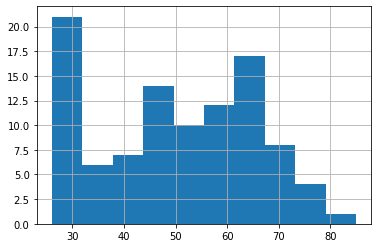

In [10]:
submission.assigned_day.value_counts().hist()

# submit

In [13]:
!kaggle competitions submit -c santa-workshop-tour-2019 -f ../submissions/submission_starter.csv -m "Message"

100%|██████████████████████████████████████| 37.4k/37.4k [00:04<00:00, 8.42kB/s]
Successfully submitted to Santa's Workshop Tour 2019

# test

In [24]:
submission = pd.read_csv('../script/submission.csv', index_col='family_id')
sub = submission['assigned_day'].tolist()

In [25]:
%time
score = cost_function(sub)
score

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


69866.40560765083

# References

- Referenced Kernel\
https://www.kaggle.com/inversion/santa-s-2019-starter-notebook